**Install Packages**

---

In [1]:
!pip install git+https://github.com/finn-sharp/Process-Mining-Analysis-on-MLB.git
!pip install -r requirements.txt

zsh:1: /Users/finn/capstone/Process-Mining-Analysis-on-MLB/cap/bin/pip: bad interpreter: /Users/finn/capstone/cap/bin/python3.13: no such file or directory
  Cloning https://github.com/finn-sharp/Process-Mining-Analysis-on-MLB.git to /private/var/folders/gp/vm8_gys11zsclk5f2rrcc2cr0000gn/T/pip-req-build-en19m3m0
  Running command git clone --filter=blob:none --quiet https://github.com/finn-sharp/Process-Mining-Analysis-on-MLB.git /private/var/folders/gp/vm8_gys11zsclk5f2rrcc2cr0000gn/T/pip-req-build-en19m3m0
  Resolved https://github.com/finn-sharp/Process-Mining-Analysis-on-MLB.git to commit 982ff4c2e1fb30bfcd849320c2fb11a84368af93
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
zsh:1: /Users/finn/capstone/Process-Mining-Analysis-on-MLB/cap/bin/pip: bad interpreter: /Users/finn/capstone/cap/bin/python3.13: no such file or directory


**Directory Structure**

---

In [2]:
!tree -L 2

.
├── LICENSE
├── README.md
├── cap
│   ├── bin
│   ├── etc
│   ├── include
│   ├── lib
│   ├── pyvenv.cfg
│   └── share
├── clustering
│   ├── __init__.py
│   ├── __pycache__
│   ├── distance.py
│   ├── utils.py
│   └── visualizer.py
├── data
│   └── pitcher_2019_2024.csv
├── inference copy.ipynb
├── inference.ipynb
├── key.json
├── lib
│   ├── bindings
│   ├── tom-select
│   └── vis-9.1.2
├── metrics
│   ├── __init__.py
│   ├── __pycache__
│   └── saber.py
├── mining
│   ├── __init__.py
│   ├── __pycache__
│   ├── exploratory.py
│   ├── pipeline.py
│   ├── preprocessing.py
│   ├── probability.py
│   ├── utils.py
│   └── visualizer.py
├── process_analysis.ipynb
├── requirements.txt
└── setup.py

18 directories, 23 files


**Load Require Packages**

---

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(('ignore'))

**Load Custom Pacakages**

---

In [4]:
from mining.preprocessing import define_at_bat_cases
from mining.preprocessing import add_node_and_preprocess
from mining.preprocessing import assign_group_index_two_pointer
from mining.preprocessing import one_way_filter

from mining.pipeline import preprocessing_df
from mining.pipeline import one_step_EDA_from_bigquery
from mining.pipeline import one_step_EDA_from_csv

from mining.probability import BasedTraces
from mining.probability import prepare_eventLog
from mining.probability import create_eventlog_from_dataFrame

from mining.exploratory import ProcessEDA
from mining.visualizer import sankey_visualizer
from mining.visualizer import interactive_graph
from mining.utils import load_data_from_bigquery

from clustering.distance import ClusteredTraces
from clustering.visualizer import MDS
from clustering.visualizer import Dendrogram
from clustering.utils import clustered_dataframe

from metrics import p_per_pa
from metrics import k_per_pa
from metrics import fip

**Load Data**

---

In [5]:
import pandas as pd
df = pd.read_csv('data/pitcher_2019_2024.csv')
display(df.describe().T)
display(df.sample(1).T)

,count,mean,std,min,25%,50%,75%,max
release_speed,107278.0,88.600979,6.466956,65.500000,83.500000,89.600000,93.700000,103.000000
release_pos_x,107264.0,-0.094090,2.022519,-3.600000,-1.840000,-0.840000,1.750000,3.880000
release_pos_z,107264.0,5.668598,0.604097,4.360000,5.160000,5.590000,6.110000,7.220000
batter,109003.0,610207.489711,64269.191340,400085.000000,572233.000000,624413.000000,664023.000000,808982.000000
pitcher,109003.0,597820.339991,67301.652704,445276.000000,521230.000000,607536.000000,656756.000000,680686.000000
...,...,...,...,...,...,...,...,...
attack_angle,11895.0,10.085375,11.837805,-80.571639,2.919178,10.401067,17.963404,69.320086
attack_direction,11895.0,-2.376020,20.855644,-179.104879,-14.518076,-1.247530,10.666228,179.414518
swing_path_tilt,11895.0,32.808677,7.264268,2.434075,28.083031,32.777465,37.486418,88.720653
intercept_ball_minus_batter_pos_x_inches,11880.0,37.109495,7.212172,10.779235,32.098467,37.246344,42.097648,69.650467


,82263
pitch_type,FF
game_date,2019-04-15
release_speed,94.1
release_pos_x,-1.84
release_pos_z,4.97
...,...
attack_direction,NaN
swing_path_tilt,NaN
intercept_ball_minus_batter_pos_x_inches,NaN
intercept_ball_minus_batter_pos_y_inches,NaN


**Data Preprocess**

---

In [6]:
df_grouped = define_at_bat_cases(df)
df_added = add_node_and_preprocess(df_grouped, start_name='start', end_name='end', case_type=None)

#example
display(df_added.head(10)[['case:concept:name','time:timestamp', 'batter', 'pitch_type', 'events', 'pitchOrder']])

,case:concept:name,time:timestamp,batter,pitch_type,events,pitchOrder
95914,0,2019-10-01 00:00:01,665742,start,NaN,-1
0,0,2019-10-01 00:00:00,665742,SI,single,0
1,0,2019-10-01 00:00:01,665742,SL,NaN,1
2,0,2019-10-01 00:00:02,665742,SI,NaN,2
95915,0,2019-10-01 00:00:01,665742,end,single,3
95916,1,2019-10-01 00:00:04,543685,start,NaN,-1
3,1,2019-10-01 00:00:00,543685,SI,walk,0
4,1,2019-10-01 00:00:01,543685,SI,NaN,1
5,1,2019-10-01 00:00:02,543685,SI,NaN,2
6,1,2019-10-01 00:00:03,543685,SI,NaN,3


**Figure1  - 마무리 투수의 2019 - 2024 시즌 내 삼진 빈도 및 비율**

---

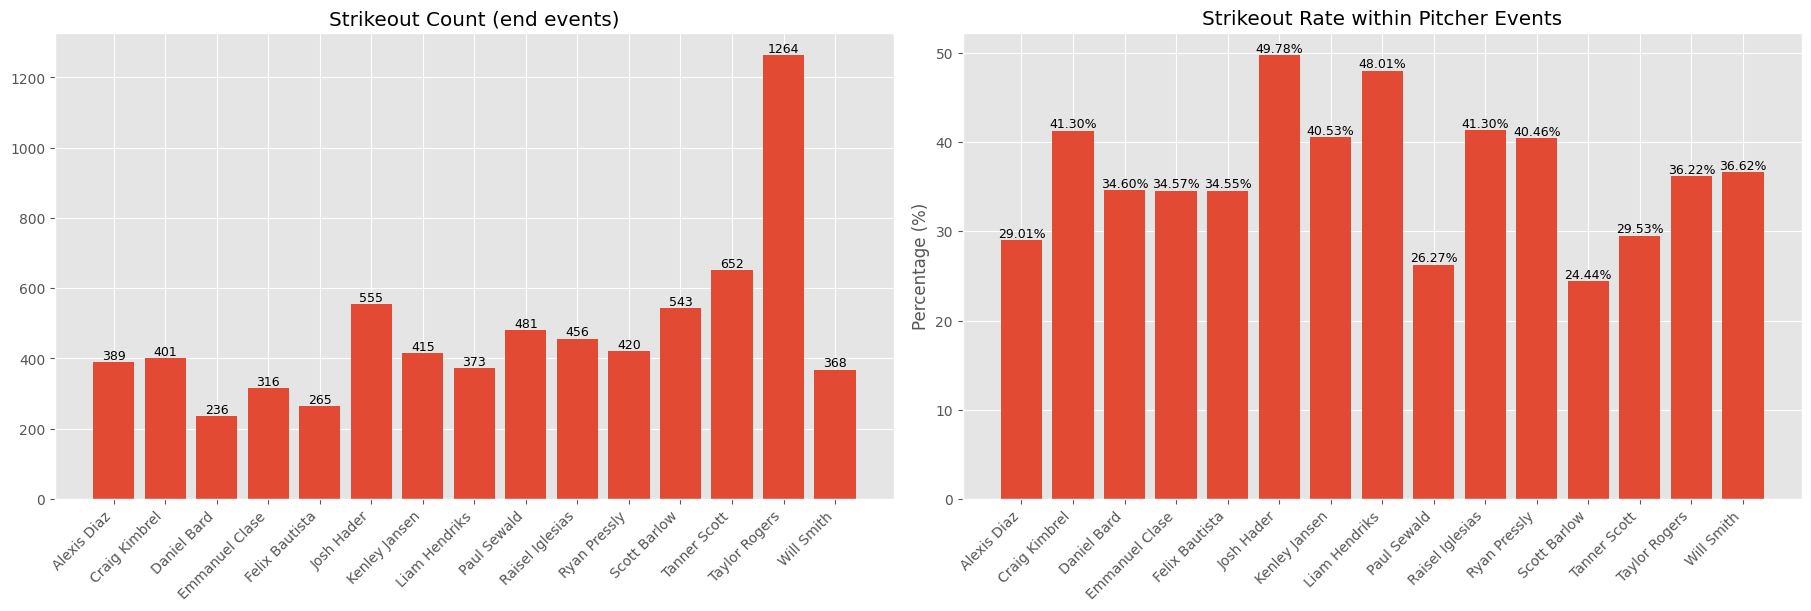

In [7]:
df_end = df_added[df_added.pitch_type=='end']
k_count = (
    df_end["events"]
    .eq("strikeout")
    .groupby(df_end["pitcher_name"])
    .sum()
)
total_count = df_end.groupby("pitcher_name").size()
k_rate = k_count / total_count


plt.style.use("ggplot")

pitchers = k_count.index
x = np.arange(len(pitchers))

fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# (1) Count
bars1 = axes[0].bar(x, k_count.values)
axes[0].set_title("Strikeout Count (end events)")
axes[0].set_xticks(x)
axes[0].set_xticklabels(pitchers, rotation=45, ha="right")

for b in bars1:
    axes[0].text(
        b.get_x() + b.get_width() / 2,
        b.get_height(),
        int(b.get_height()),
        ha="center",
        va="bottom",
        fontsize=9
    )

# (2) Rate
bars2 = axes[1].bar(x, k_rate.values * 100)
axes[1].set_title("Strikeout Rate within Pitcher Events")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xticks(x)
axes[1].set_xticklabels(pitchers, rotation=45, ha="right")

for b in bars2:
    axes[1].text(
        b.get_x() + b.get_width() / 2,
        b.get_height(),
        f"{b.get_height():.2f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.show()


**Pitcher Data**

---

In [8]:
df_hader = df_added[df_added.pitcher_name == 'Josh Hader']
df_rogers = df_added[df_added.pitcher_name == 'Taylor Rogers']

**Clustering**

---

In [9]:
df_hader_filtered = one_way_filter(df_hader, 'events', ['strikeout'])
clusted_hader_filtered = ClusteredTraces(df_hader_filtered)
final_results = clusted_hader_filtered(n_clusters = 3)

**Figure2 - Dendrogram**

---

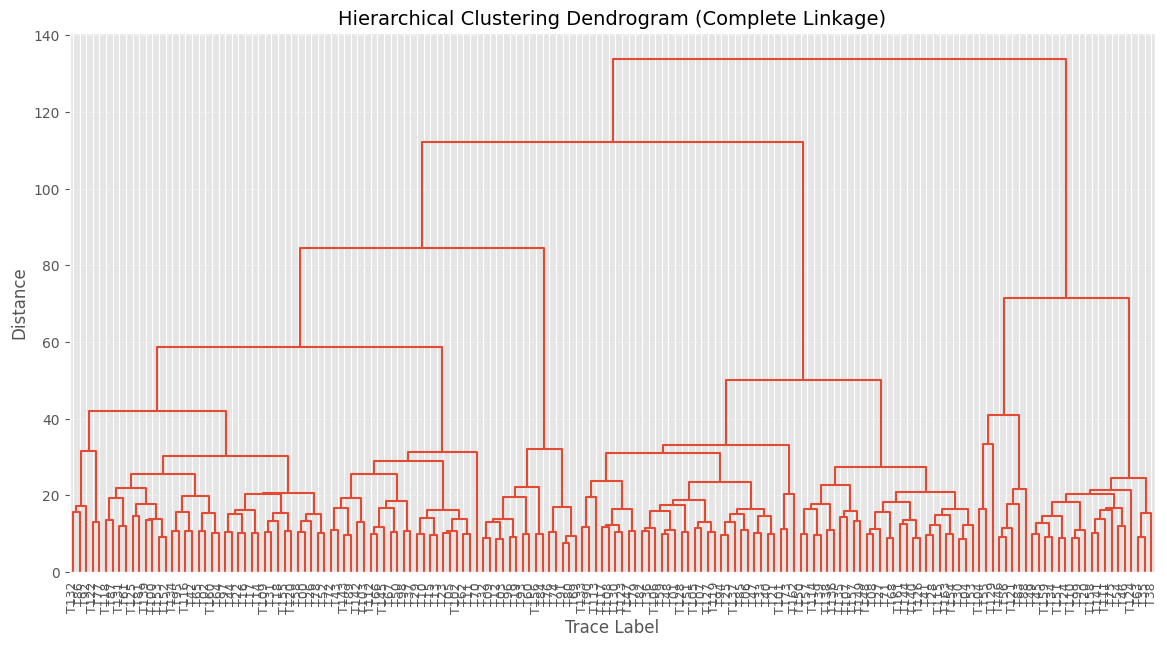


===== Cluster Composition =====

### Cluster 0
 T04 : start → SL → SI → SI → SI → SI → SI → SI → end
 T08 : start → SI → SI → SL → SI → SI → SI → SI → end
 T20 : start → SL → SI → SI → SL → SI → SL → SI → SI → end
 T24 : start → SI → SI → SI → SI → SI → SL → SL → SI → end
 T27 : start → SI → SI → SI → SI → SI → SI → SI → end
 T28 : start → SI → SL → SL → SI → SI → SI → SI → end
 T30 : start → SL → SL → SI → SI → SI → SI → SI → end
 T34 : start → SI → SI → SL → SI → SI → SL → SI → SI → end
 T35 : start → SL → SI → SL → SI → SI → SI → SI → SI → end
 T38 : start → SI → SI → SI → SI → SI → SI → SI → SI → end
 T39 : start → SI → SL → SI → SL → SI → SI → SI → end
 T41 : start → SI → SL → SI → SI → SI → SI → SI → end
 T45 : start → SI → SI → SI → SI → SL → SL → SI → SI → end
 T46 : start → SI → SL → SI → SL → SI → SI → SL → SI → end
 T49 : start → SI → SI → SL → SI → SL → SL → SI → SI → end
 T53 : start → SL → SI → SI → SI → SL → SI → SI → end
 T54 : start → SL → SL → SI → SI → SI → SI → SL 

In [10]:
Dendrogram(final_results)

**Figure3 - Sequence Lengths**

---


1. Cluster Label을 Dataframe에 반영

In [11]:
df_hader_filtered_clustered = clustered_dataframe(final_results, df_hader_filtered)
display(df_hader_filtered_clustered.cluster.value_counts().to_frame().T)

cluster,1,2,0
count,1705,1441,640


2. cluster 별 Sequence Lengths Visualization

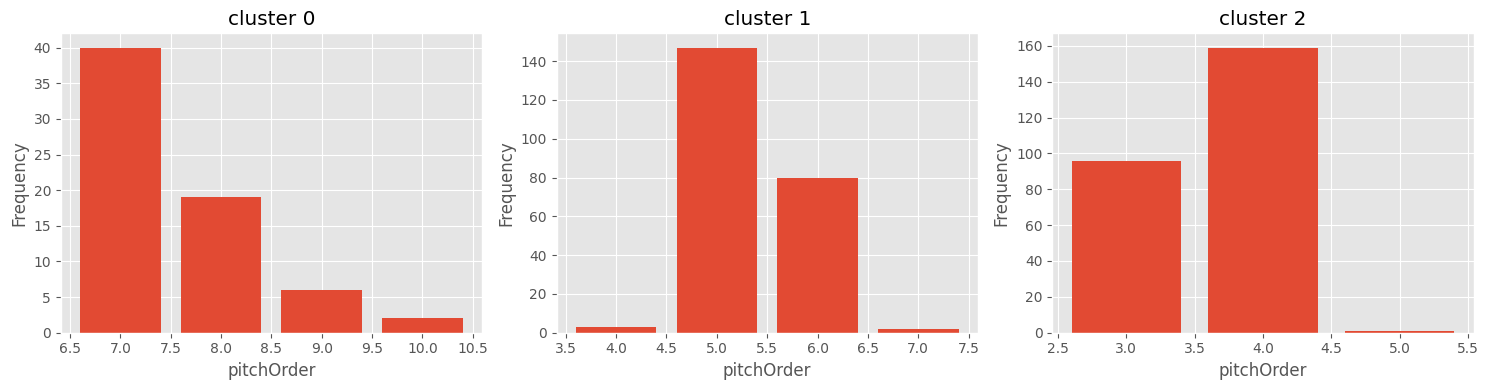

In [12]:

# 1. end 이벤트만 필터링
df_end = df_hader_filtered_clustered[df_hader_filtered_clustered["pitch_type"].eq("end")]

# 2. 클러스터 목록
clusters = sorted(df_end["cluster"].unique())
n_clusters = len(clusters)

# 3. subplot 생성
fig, axes = plt.subplots(1, n_clusters, figsize=(5 * n_clusters, 4))#, sharey=True)

# cluster가 1개일 때도 iterable하게 처리
if n_clusters == 1:
    axes = [axes]

# 4. cluster별 pitchOrder 막대그래프
for ax, c in zip(axes, clusters):
    data = df_end[df_end["cluster"] == c]["pitchOrder"]

    counts = data.value_counts().sort_index()

    ax.bar(counts.index, counts.values)
    ax.set_title(f"cluster {c}")
    ax.set_xlabel("pitchOrder")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


**Figure4 - MDS**

---

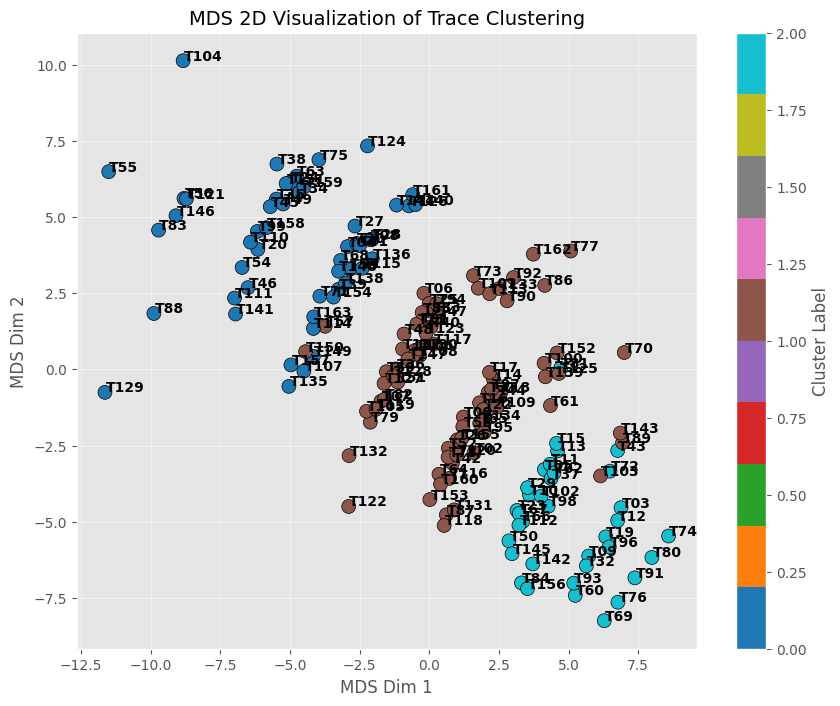

In [13]:
MDS(final_results)

**Figure5 - Ratio of Events by batter L/R**

---

1. 삼진(Strikeout) 필터를 적용하지 않고 군집화

In [14]:
clusted_hader = ClusteredTraces(df_hader)
final_results = clusted_hader(n_clusters = 3)
df_hader_clustered = clustered_dataframe(final_results, df_hader)
display(df_hader_clustered.cluster.value_counts().to_frame().T)

cluster,1,2,0
count,4480,2910,289


2. 전체 및 군집 별 Events 비율 비교

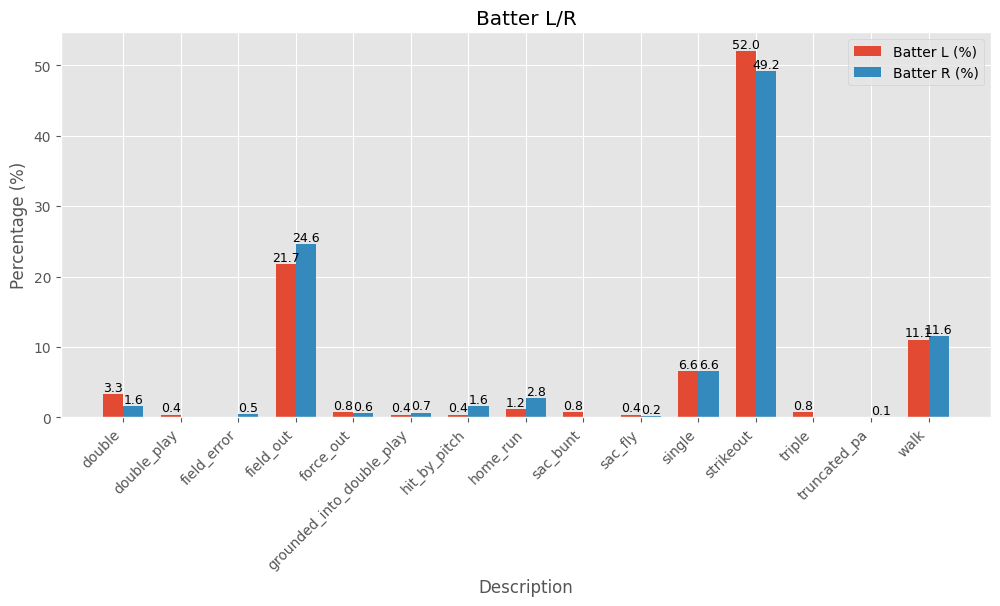

In [15]:
plt.style.use("ggplot")

cnt = (
    df_hader_clustered
    .groupby(["stand", "events"])
    .size()
    .reset_index(name="count")
)

cnt["rate"] = cnt.groupby("stand")["count"].transform(
    lambda x: x / x.sum()
) * 100

pivot = cnt.pivot(index="events", columns="stand", values="rate").fillna(0)

events = pivot.index
x = np.arange(len(events))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))

bars_L = ax.bar(x - width/2, pivot["L"], width, label="Batter L (%)")
bars_R = ax.bar(x + width/2, pivot["R"], width, label="Batter R (%)")

ax.set_title("Batter L/R")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Description")
ax.set_xticks(x)
ax.set_xticklabels(events, rotation=45, ha="right")
ax.legend()


for bars in [bars_L, bars_R]:
    for b in bars:
        if b.get_height() > 0:
            ax.text(
                b.get_x() + b.get_width()/2,
                b.get_height(),
                f"{b.get_height():.1f}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.show()


3. 군집별 데이터 분할

In [16]:
cluster_0 = df_hader_clustered[df_hader_clustered.cluster.eq(0)]
cluster_1 = df_hader_clustered[df_hader_clustered.cluster.eq(1)]
cluster_2 = df_hader_clustered[df_hader_clustered.cluster.eq(2)]

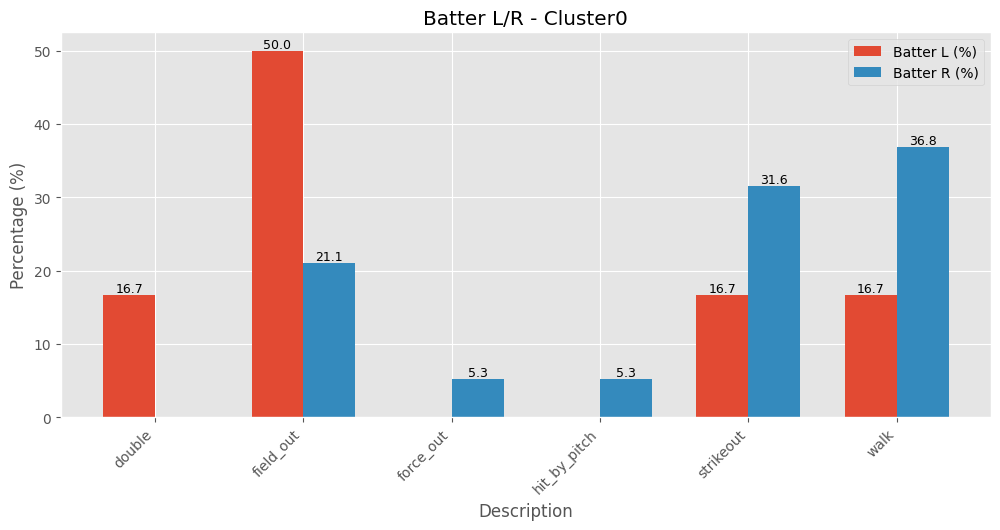

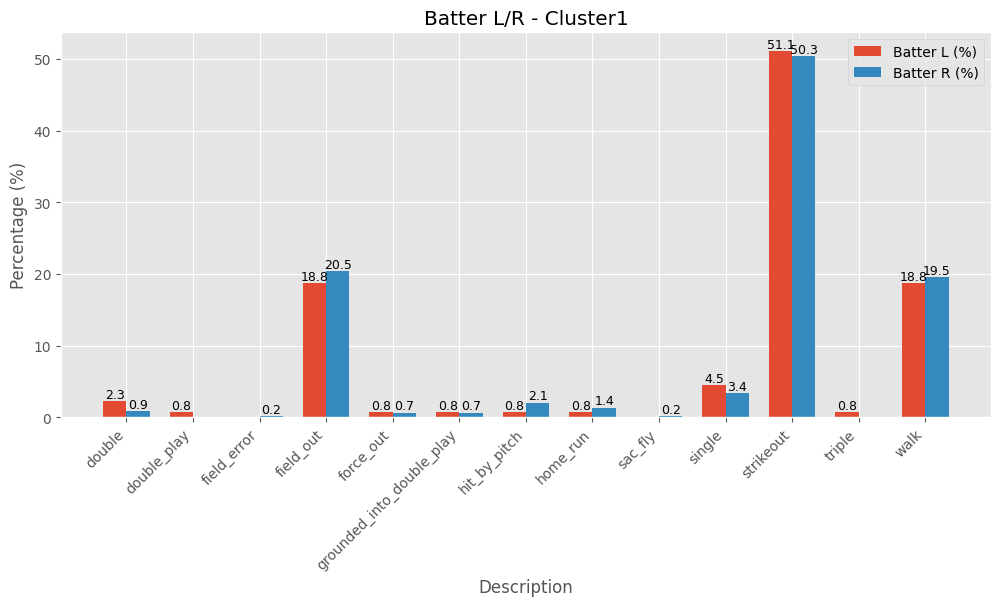

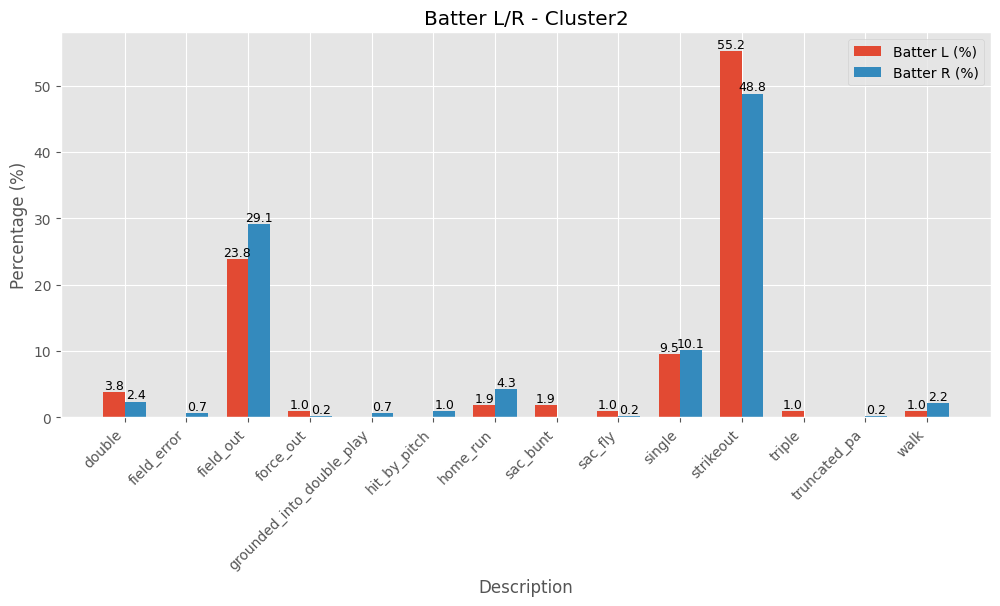

In [17]:
plt.style.use("ggplot")

# cluster - 0
cnt = (
    cluster_0
    .groupby(["stand", "events"])
    .size()
    .reset_index(name="count")
)

cnt["rate"] = cnt.groupby("stand")["count"].transform(
    lambda x: x / x.sum()
) * 100

pivot = cnt.pivot(index="events", columns="stand", values="rate").fillna(0)

events = pivot.index
x = np.arange(len(events))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))

bars_L = ax.bar(x - width/2, pivot["L"], width, label="Batter L (%)")
bars_R = ax.bar(x + width/2, pivot["R"], width, label="Batter R (%)")

ax.set_title(f"Batter L/R - Cluster0")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Description")
ax.set_xticks(x)
ax.set_xticklabels(events, rotation=45, ha="right")
ax.legend()


for bars in [bars_L, bars_R]:
    for b in bars:
        if b.get_height() > 0:
            ax.text(
                b.get_x() + b.get_width()/2,
                b.get_height(),
                f"{b.get_height():.1f}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.show()

# cluster - 1
cnt = (
    cluster_1
    .groupby(["stand", "events"])
    .size()
    .reset_index(name="count")
)

cnt["rate"] = cnt.groupby("stand")["count"].transform(
    lambda x: x / x.sum()
) * 100

pivot = cnt.pivot(index="events", columns="stand", values="rate").fillna(0)

events = pivot.index
x = np.arange(len(events))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))

bars_L = ax.bar(x - width/2, pivot["L"], width, label="Batter L (%)")
bars_R = ax.bar(x + width/2, pivot["R"], width, label="Batter R (%)")

ax.set_title(f"Batter L/R - Cluster1")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Description")
ax.set_xticks(x)
ax.set_xticklabels(events, rotation=45, ha="right")
ax.legend()


for bars in [bars_L, bars_R]:
    for b in bars:
        if b.get_height() > 0:
            ax.text(
                b.get_x() + b.get_width()/2,
                b.get_height(),
                f"{b.get_height():.1f}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.show()


# cluster - 2
cnt = (
    cluster_2
    .groupby(["stand", "events"])
    .size()
    .reset_index(name="count")
)

cnt["rate"] = cnt.groupby("stand")["count"].transform(
    lambda x: x / x.sum()
) * 100

pivot = cnt.pivot(index="events", columns="stand", values="rate").fillna(0)

events = pivot.index
x = np.arange(len(events))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))

bars_L = ax.bar(x - width/2, pivot["L"], width, label="Batter L (%)")
bars_R = ax.bar(x + width/2, pivot["R"], width, label="Batter R (%)")

ax.set_title(f"Batter L/R - Cluster2")
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Description")
ax.set_xticks(x)
ax.set_xticklabels(events, rotation=45, ha="right")
ax.legend()


for bars in [bars_L, bars_R]:
    for b in bars:
        if b.get_height() > 0:
            ax.text(
                b.get_x() + b.get_width()/2,
                b.get_height(),
                f"{b.get_height():.1f}",
                ha="center",
                va="bottom",
                fontsize=9
            )

plt.show()

**Figure6 - Transition Probability**

---

1. 전체 Events에 대하여 hader의 EDA 인스턴스 생성

In [18]:
 traces_hader = BasedTraces(df_hader)
 traces_result = traces_hader()
 eda = ProcessEDA(traces_result)

In [19]:
print('[전체 Josh Hader의 Layer별 전이 확률 시각화 \n')
eda.Transition.Probability.visualizer(layered=True, grouped=False)

[전체 Josh Hader의 Layer별 전이 확률 시각화 



2. 각각의 군집별 EDA 인스턴스 생성

In [20]:
# cluster 01
traces_hader_0 = BasedTraces(cluster_0)
traces_result_0 = traces_hader_0()
eda_c0 = ProcessEDA(traces_result_0)

# cluster 02
traces_hader_1 = BasedTraces(cluster_1)
traces_result_1 = traces_hader_1()
eda_c1 = ProcessEDA(traces_result_1)

# cluster 03
traces_hader_2 = BasedTraces(cluster_2)
traces_result_2 = traces_hader_2()
eda_c2 = ProcessEDA(traces_result_2)

In [21]:
print('Josh Hader의 Layer별 전이 확률 시각화(Cluster - 0) \n')
eda_c0.Transition.Probability.visualizer(layered=True, grouped=False)

print('Josh Hader의 Layer별 전이 확률 시각화(Cluster - 1) \n')
eda_c1.Transition.Probability.visualizer(layered=True, grouped=False)

print('Josh Hader의 Layer별 전이 확률 시각화(Cluster - 2) \n')
eda_c2.Transition.Probability.visualizer(layered=True, grouped=False)

Josh Hader의 Layer별 전이 확률 시각화(Cluster - 0) 



Josh Hader의 Layer별 전이 확률 시각화(Cluster - 1) 



Josh Hader의 Layer별 전이 확률 시각화(Cluster - 2) 



**Figure7 - Ragers의 군집별 Sequence Lengths**

---

1. Tayer Rogers 군집화

cluster,4,1,3,5,2,0
count,18252,2993,965,454,394,171


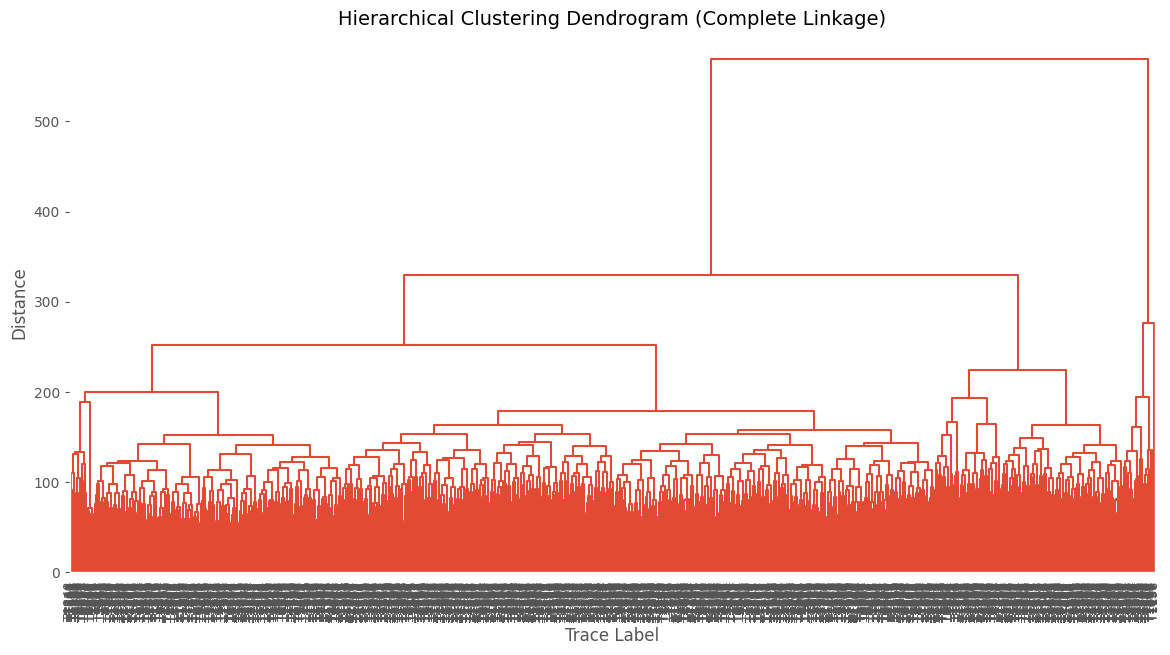


===== Cluster Composition =====

### Cluster 0
 T198 : start → CH → KC → KC → FF → KC → CH → CH → KC → FF → KC → end
 T360 : start → FF → FF → KC → CH → SI → FF → CH → CH → CH → KC → end
 T376 : start → KC → CH → SI → FF → SI → KC → CH → SI → SI → SI → FF → end
 T468 : start → CH → KC → SI → FF → KC → CH → CH → FF → SI → FF → end
 T521 : start → KC → KC → SI → CH → CH → KC → SI → KC → FF → end
 T635 : start → FF → CH → KC → FF → FF → CH → CH → SI → KC → end
 T637 : start → KC → CH → FF → KC → KC → SI → CH → CH → KC → SI → KC → end
 T733 : start → FF → KC → CH → FF → KC → FF → KC → CH → FF → KC → end
 T1129 : start → FF → KC → KC → FF → SI → KC → SI → KC → SI → SI → SI → end
 T1198 : start → FF → CH → CH → KC → KC → FF → CH → CH → FF → FF → KC → end
 T1385 : start → KC → KC → SI → SI → KC → FF → CH → KC → SI → KC → FF → end
 T1510 : start → CH → FF → KC → FF → CH → CH → KC → KC → FF → KC → end
 T1603 : start → KC → KC → KC → KC → CH → SI → KC → KC → FF → KC → end
 T1802 : start → KC → 

In [22]:
clusted_rogers = ClusteredTraces(df_rogers)
final_results = clusted_rogers(n_clusters = 6)
df_rogers_clustered = clustered_dataframe(final_results, df_rogers)
display(df_rogers_clustered.cluster.value_counts().to_frame().T)

Dendrogram(final_results)

2. Rogers의 군집별 Sequence Lengths Visualization

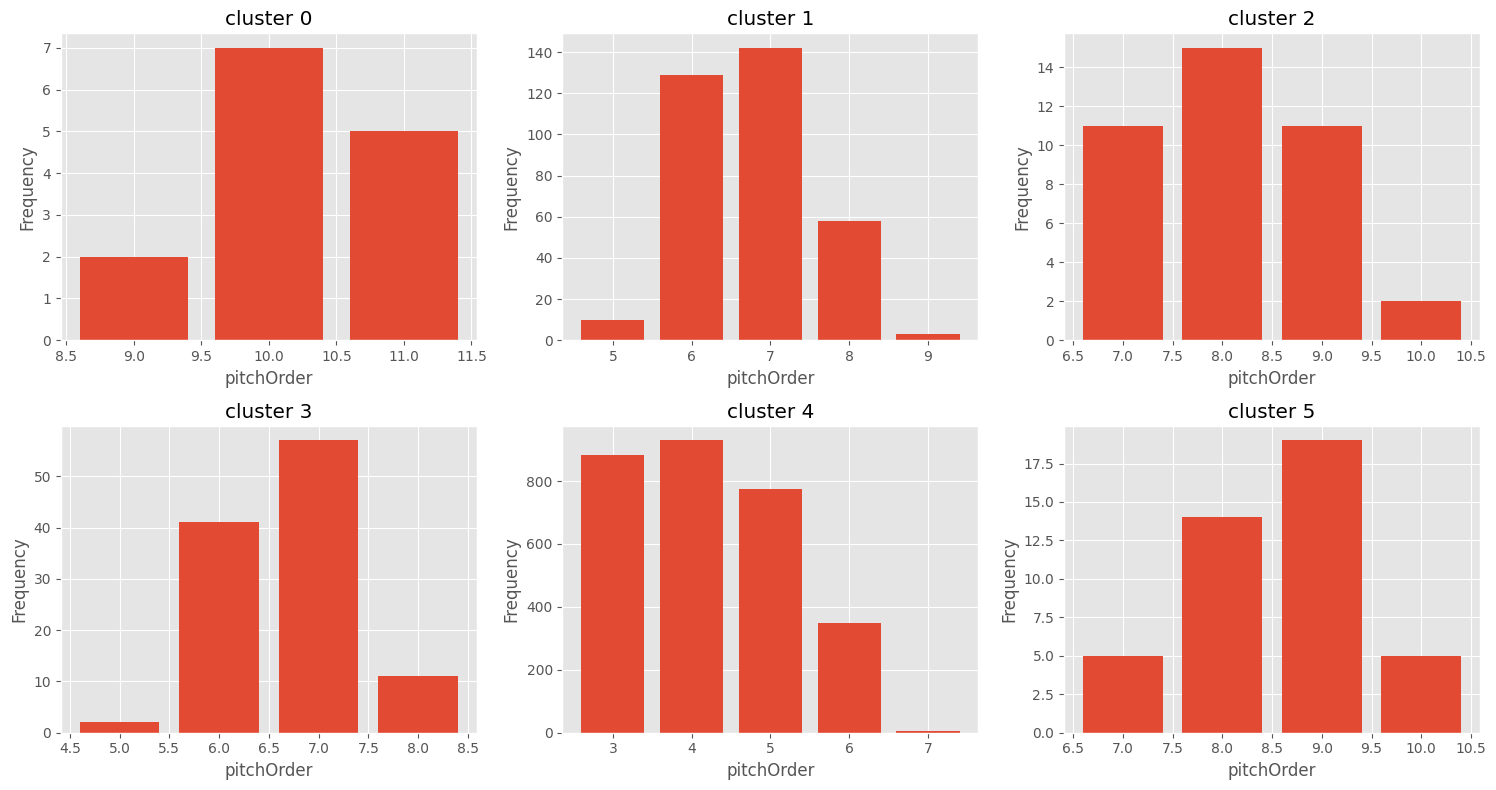

In [23]:
import matplotlib.pyplot as plt
import math

# 1. end 이벤트만 필터링
df_end_hader_filtered = df_rogers_clustered[
    df_rogers_clustered["pitch_type"].eq("end")
]

# 2. 클러스터 목록
clusters = sorted(df_end_hader_filtered["cluster"].unique())
n_clusters = len(clusters)

# 3. 2행 3열 subplot 생성
n_rows, n_cols = 2, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# axes를 1차원으로 펴기
axes = axes.flatten()

# 4. cluster별 pitchOrder 막대그래프
for ax, c in zip(axes, clusters):
    data = df_end_hader_filtered[
        df_end_hader_filtered["cluster"] == c
    ]["pitchOrder"]

    counts = data.value_counts().sort_index()

    ax.bar(counts.index, counts.values)
    ax.set_title(f"cluster {c}")
    ax.set_xlabel("pitchOrder")
    ax.set_ylabel("Frequency")

# 5. 남는 subplot 비활성화
for ax in axes[n_clusters:]:
    ax.axis("off")

plt.tight_layout()
plt.show()



**Table  - P/PA, K/PA, FIP**

---

1. Josh Haderd의 P/PA Table(군집, 전체) + (삼진 적용)

In [24]:
val_all, tb_ppa_cls = p_per_pa(df_hader_filtered_clustered)
display(tb_ppa_cls)

,unit,pitches,PA,P/PA
0,all,3786,555,6.821622
1,0,640,67,9.552239
2,1,1705,232,7.349138
3,2,1441,256,5.628906


2. Josh Haderd의 K/PA(군집, 전체) + (삼진 미적용)

In [ ]:
val_cls, tb_kpa_cls = k_per_pa(df_hader_clustered)
display(tb_kpa_cls)

,cluster,PA,K,K/PA
0,all,1115,555,0.497758
1,0,25,7,0.280000
2,1,568,287,0.505282
3,2,522,261,0.500000


4. Tayer Rogers의 FIP 계산

In [26]:
fip(df_rogers_clustered)

,PA,K,BB,HBP,HR,OUTS,IP,FIP
cluster,,,,,,,,
0,14,4,8,0,2,10,3.333333,15.700000
1,342,276,108,6,18,470,156.666667,3.253191
2,39,16,18,0,2,42,14.000000,6.528571
3,111,66,50,0,6,128,42.666667,5.350000
4,2941,2136,342,36,162,4348,1449.333333,2.387948
5,43,30,22,0,0,54,18.000000,3.433333


In [27]:
fip(df_rogers)

,PA,K,BB,HBP,HR,OUTS,IP,FIP
pitcher,,,,,,,,
605400,3490,2528,548,42,190,5052,1684.0,2.615439


In [28]:
fip(df_hader_clustered)

,PA,K,BB,HBP,HR,OUTS,IP,FIP
cluster,,,,,,,,
0,25,14,16,2,0,30,10.000000,5.700000
1,568,574,220,20,14,822,274.000000,2.202190
2,522,522,20,8,40,832,277.333333,1.513462


In [29]:
fip(df_hader)

,PA,K,BB,HBP,HR,OUTS,IP,FIP
pitcher,,,,,,,,
623352,1115,1110,256,30,54,1684,561.333333,1.924228
